Multiple Regression Model to Predict median home value of Boston house's prices  

In [1]:
import statsmodels.api as sm

In [2]:
# we import a dataset of Boston House Prices from sklearn 
from sklearn import datasets 
data = datasets.load_boston() 
print(data.DESCR)# to print the discription of this data


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
data

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [4]:

# Because our dataset can't be used this way to construct the model we're gonna reshape it using pandas library
# as above the dataset is already sperating "target" variable (median home value) from other 13 variables 
import pandas as pd
X=pd.DataFrame(data.data, columns=data.feature_names)
Y=pd.DataFrame(data.target,columns=["Target"])

## Next Xtep check the variables we're gonna use to explain our Target Variable
#throught the correlation criteria, One way to do it is to take each variable and 
#to analyse the predictions made by the model constructed using X our predictors and
#appllied to the variables X

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()
#R-squared (uncentered):	0.959 which means that our model explains 95,9% of variance
#each coefficient assigned to a variable describes the changes happening to Y 
#which means that if we take the variable CRIM if this one increases by one predicted value of Y
#decreases by 0.0916 because the coefficient asigned to this varialbe is equal to -0.0916


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.1
Date:                Sat, 14 Dec 2019   Prob (F-statistic):                        0.00
Time:                        21:29:43   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3129.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
model_strong_dep = sm.OLS(Y, X[["CHAS","NOX","RM","DIS","PTRATIO","LSTAT"]]).fit()
predictions2 = model_strong_dep.predict(X[["CHAS","NOX","RM","DIS","PTRATIO","LSTAT"]]) 
# make the predictions by the model 
model_strong_dep.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1734.
Date:                Sat, 14 Dec 2019   Prob (F-statistic):                        0.00
Time:                        19:22:37   Log-Likelihood:                         -1553.2
No. Observations:                 506   AIC:                                      3118.
Df Residuals:                     500   BIC:                                      3144.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHAS           3.4906      0.938      3.721      0.000       1.648       5.334
NOX           -5.4558      2.953     -1.847      0.065     -11.258       0.347
RM             6.5542      0.291     22.540      0.000       5.983       7.125
DIS           -0.3903      0.147     -2.656      0.008      -0.679      -0.102
PTRATIO       -0.4557      0.096     -4.751      0.000      -0.644      -0.267
LSTAT         -0.4795      0.049     -9.784      0.000      -0.576      -0.383
==============================================================================
Omnibus:                      171.446   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1024.242
Skew:                           1.346   Prob(JB):                    3.88e-223
Kurtosis:                       9.429   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X[["CHAS","NOX","RM","DIS","PTRATIO","LSTAT"]],
                                                    Y, test_size=0.2)


In [20]:
# fit a model_1 using library sklearn
lm = linear_model.LinearRegression()
model_1 = lm.fit(X_train, y_train)
predictions_1 = model_1.predict(X_test)
print(model_1.score(X_test,y_test),model_1.score(X_train,y_train))

0.750501874835 0.706057068667


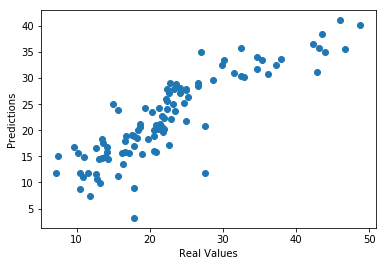

In [21]:
from matplotlib import pyplot as plt
## The line / model
plt.scatter(y_test, predictions_1)
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X[["CHAS","NOX","RM","DIS","PTRATIO","LSTAT"]],
                                                    Y, test_size=0.2)
# fit a model_1 using the linear regression of the library statsmodels 
model_2 = sm.OLS(y_train, X_train).fit()
predictions_2 = model_2.predict(X_test) 
# make the predictions 
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              1253.
Date:                Sat, 14 Dec 2019   Prob (F-statistic):                   6.99e-255
Time:                        22:23:52   Log-Likelihood:                         -1263.0
No. Observations:                 404   AIC:                                      2538.
Df Residuals:                     398   BIC:                                      2562.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHAS           2.8890      1.141      2.532      0.012       0.646       5.132
NOX           -6.7868      3.430     -1.979      0.049     -13.530      -0.044
RM             6.5134      0.331     19.705      0.000       5.864       7.163
DIS           -0.4184      0.174     -2.400      0.017      -0.761      -0.076
PTRATIO       -0.3977      0.113     -3.519      0.000      -0.620      -0.176
LSTAT         -0.4668      0.057     -8.169      0.000      -0.579      -0.354
==============================================================================
Omnibus:                      134.217   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.753
Skew:                           1.324   Prob(JB):                    1.52e-153
Kurtosis:                       8.899   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

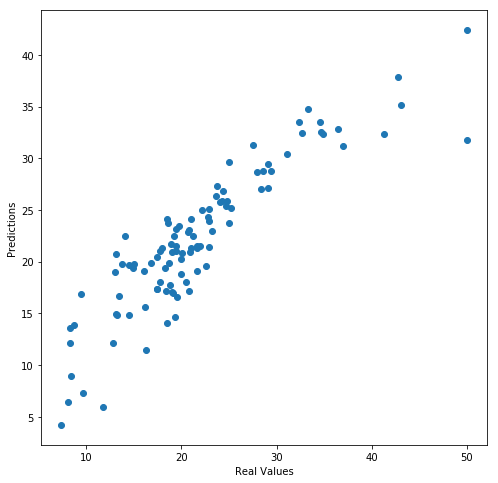

In [43]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions_2)
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

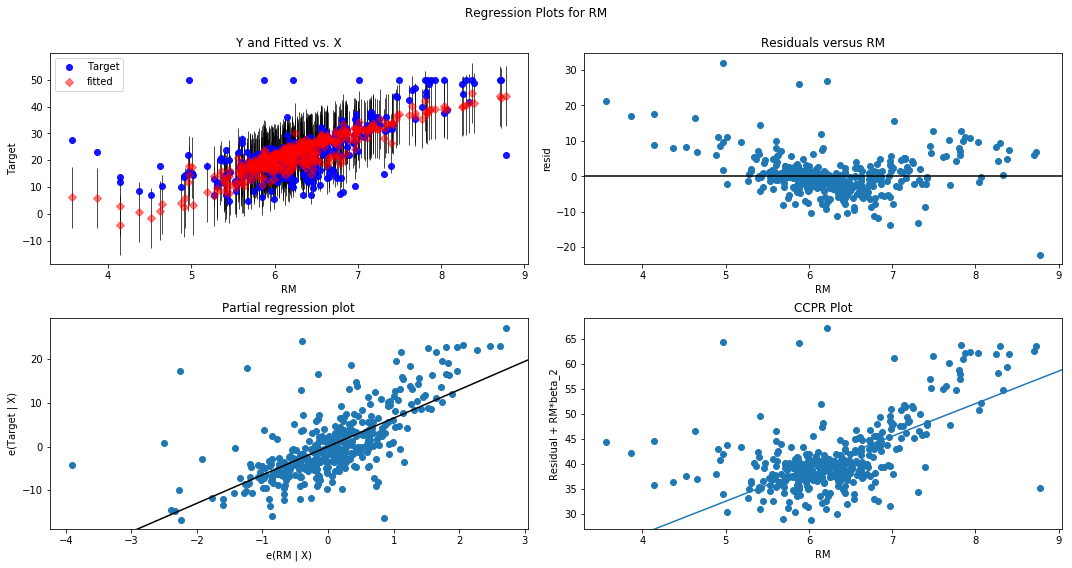

In [44]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_2,"RM" , fig=fig)

#RM and NOX is the variable that explain the max of the variation of 

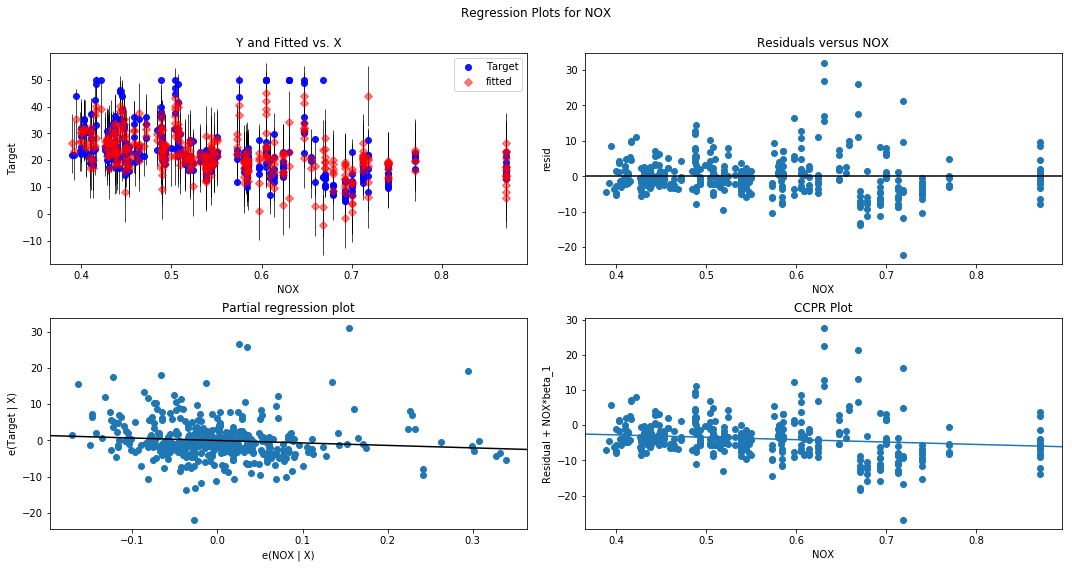

In [45]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_2,"NOX" , fig=fig)
